In [3]:
!unzip -q tsukuba.zip

mapname:  conversion of  failed


In [21]:
!unzip -q Aloe_images.zip

#PROBLEM 1 - Pixel-wise matching

Xây dựng hàm tính disparity map của hai ảnh stereo đầu vào (ảnh bên trái (L) và ảnh bên phải (R)) theo phương thức **pixel-wise matching**

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [5]:
def l1_distance(x, y):
  return abs(x - y)

def l2_distance(x, y):
  return (x-y)**2

In [9]:
def pixel_wise_matching_l1(left_img, right_img, disparity_range, save_result = True):
  #read img and convert to grayscale
  left = cv2.imread(left_img, 0)
  right = cv2.imread(right_img, 0)

  left = left.astype(np.float32)
  right = right.astype(np.float32)

  #get img size
  height, width = left.shape[:2]

  #create blank disparity map
  depth = np.zeros((height, width), np.uint8)
  scale = 16
  max_value = 255

  for y in range(height):
    for x in range(width):
      #find j where cost has minimum value
      disparity = 0
      cost_min = max_value

      for j in range(disparity_range):
        cost = max_value if (x-j) < 0 else l1_distance(int(left[y,x]), int(right[y,x-j]))

        if cost < cost_min:
          cost_min = cost
          disparity = j

      #Let depth at (y, x) = j (disparity)
      #Mutiply by a scale factor for visualisation purpose
      depth[y,x] = disparity * scale

  if save_result == True:
    print('Saving result...')
    cv2.imwrite('pixel_wise_l1.png', depth)
    cv2.imwrite('pixel_wise_l1_color.png',
                cv2.applyColorMap(depth, cv2.COLORMAP_JET))
  print('Done.')
  return depth, cv2.applyColorMap(depth, cv2.COLORMAP_JET)

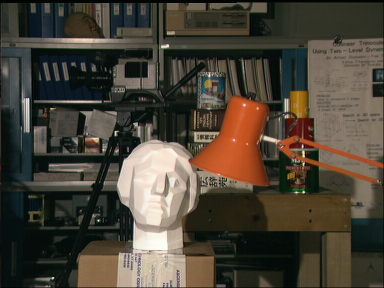

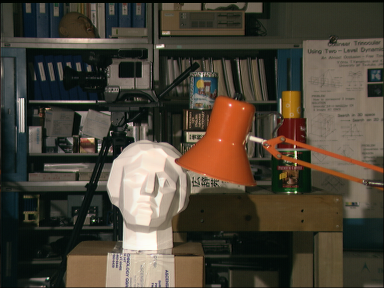

In [18]:
left_img = '/content/left.png'
right_img = '/content/right.png'
disparity_range = 16

cv2_imshow(cv2.imread(left_img))
cv2_imshow(cv2.imread(right_img))

Saving result...
Done.


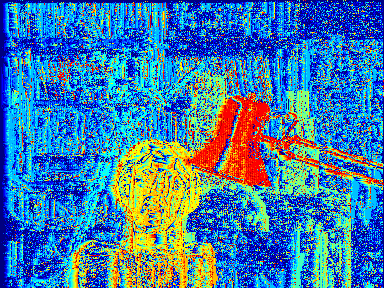

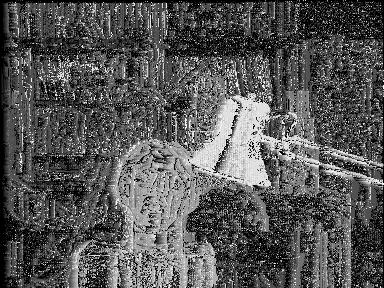

In [19]:
depth, color = pixel_wise_matching_l1(left_img, right_img, disparity_range)
cv2_imshow(color)
cv2_imshow(depth)

In [16]:
def pixel_wise_matching_l2(left_img, right_img, disparity_range, save_result = True):
  #read img and convert to grayscale
  left = cv2.imread(left_img, 0)
  right = cv2.imread(right_img, 0)

  left = left.astype(np.float32)
  right = right.astype(np.float32)

  #get img size
  height, width = left.shape[:2]

  #create blank disparity map
  depth = np.zeros((height, width), np.uint8)
  scale = 16
  max_value = 255

  for y in range(height):
    for x in range(width):
      #find j where cost has minimum value
      disparity = 0
      cost_min = max_value

      for j in range(disparity_range):
        cost = max_value if (x-j) < 0 else l2_distance(int(left[y,x]), int(right[y,x-j]))

        if cost < cost_min:
          cost_min = cost
          disparity = j

      #Let depth at (y, x) = j (disparity)
      #Mutiply by a scale factor for visualisation purpose
      depth[y,x] = disparity * scale

  if save_result == True:
    print('Saving result...')
    cv2.imwrite('pixel_wise_l1.png', depth)
    cv2.imwrite('pixel_wise_l1_color.png',
                cv2.applyColorMap(depth, cv2.COLORMAP_JET))
  print('Done.')
  return depth, cv2.applyColorMap(depth, cv2.COLORMAP_JET)

Saving result...
Done.


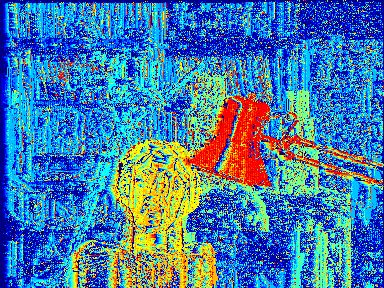

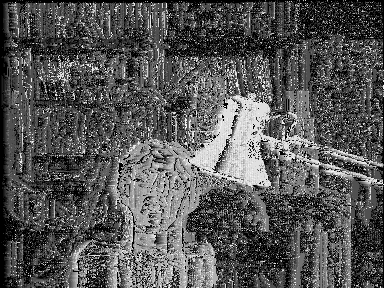

In [17]:
left_img = '/content/left.png'
right_img = '/content/right.png'
disparity_range = 16

depth, color = pixel_wise_matching_l2(left_img, right_img, disparity_range)
cv2_imshow(color)
cv2_imshow(depth)

#Problem 2 - Window-based matching

Xây dựng hàm tính disparity map của hai ảnh stereo đầu vào (ảnh bên trái (L)
và ảnh bên phải (R)) theo phương thức window-based matching.

In [20]:
def window_based_matching_l1(left_img, right_img, disparity_range, kernel_size = 5, save_result = True):
  left = cv2.imread(left_img, 0)
  right = cv2.imread(right_img, 0)

  left = left.astype(np.float32)
  right = right.astype(np.float32)

  height, width = left.shape[:2]

  #Create blank disparity map
  depth = np.zeros((height, width), np.uint8)

  kernel_half = int((kernel_size-1)/2)
  scale = 3
  max_value = 255*9

  for y in range(kernel_half, height-kernel_half+1):
    for x in range(kernel_half, width-kernel_half+1):
      #find j where cost has minimum value
      disparity = 0
      cost_min = 65534

      for j in range(disparity_range):
        total = 0
        value = 0

        for v in range(-kernel_half, kernel_half):
          for u in range(-kernel_half, kernel_half):
            value = max_value
            if (x + u - j) >= 0:
              value = l1_distance(int(left[y+v, x+u]), int(right[y+v, x+u-j]))
              total += value

        if total < cost_min:
          cost_min = total
          disparity = j

        depth[y,x] = disparity*scale
  if save_result == True:
    print('Saving result...')
    cv2.imwrite('window_based_l1.png', depth)
    cv2.imwrite('window_based_l1_color.png',
                cv2.applyColorMap(depth, cv2.COLORMAP_JET))
  print('Done.')

  return depth, cv2.applyColorMap(depth, cv2.COLORMAP_JET)

In [22]:
left_img_path = '/content/Aloe/Aloe_left_1.png'
right_img_path = '/content/Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 3

Saving result...
Done.


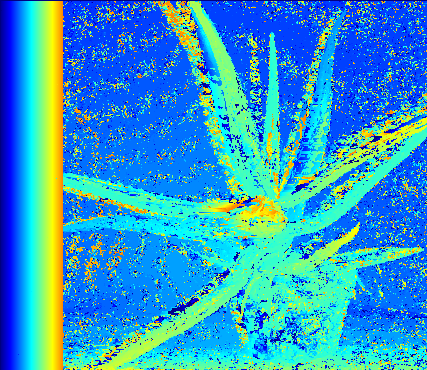

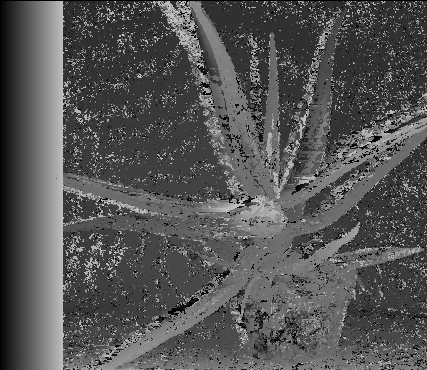

In [23]:
depth, color = window_based_matching_l1(left_img_path, right_img_path, disparity_range, kernel_size)
cv2_imshow(color)
cv2_imshow(depth)

In [24]:
def window_based_matching_l2(left_img, right_img, disparity_range, kernel_size = 5, save_result = True):
  left = cv2.imread(left_img, 0)
  right = cv2.imread(right_img, 0)

  left = left.astype(np.float32)
  right = right.astype(np.float32)

  height, width = left.shape[:2]

  #Create blank disparity map
  depth = np.zeros((height, width), np.uint8)

  kernel_half = int((kernel_size-1)/2)
  scale = 3
  max_value = 255*9

  for y in range(kernel_half, height-kernel_half+1):
    for x in range(kernel_half, width-kernel_half+1):
      #find j where cost has minimum value
      disparity = 0
      cost_min = 65534

      for j in range(disparity_range):
        total = 0
        value = 0

        for v in range(-kernel_half, kernel_half):
          for u in range(-kernel_half, kernel_half):
            value = max_value
            if (x + u - j) >= 0:
              value = l2_distance(int(left[y+v, x+u]), int(right[y+v, x+u-j]))
              total += value

        if total < cost_min:
          cost_min = total
          disparity = j

        depth[y,x] = disparity*scale
  if save_result == True:
    print('Saving result...')
    cv2.imwrite('window_based_l1.png', depth)
    cv2.imwrite('window_based_l1_color.png',
                cv2.applyColorMap(depth, cv2.COLORMAP_JET))
  print('Done.')

  return depth, cv2.applyColorMap(depth, cv2.COLORMAP_JET)

Saving result...
Done.


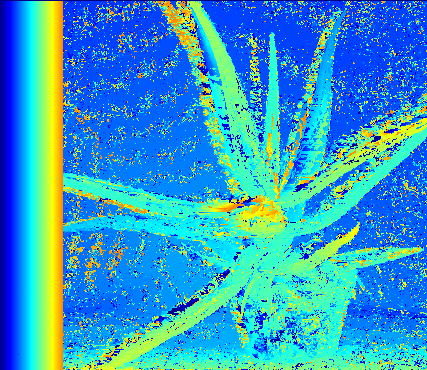

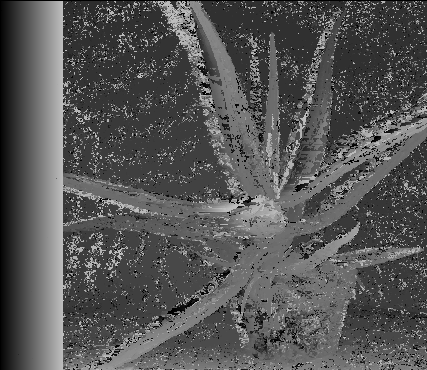

In [26]:
depth, color = window_based_matching_l2(left_img_path, right_img_path, disparity_range, kernel_size)
cv2_imshow(color)
cv2_imshow(depth)

#Problem 3 - Ảnh stereo khác nhau về độ sáng

Độ đo L1, L2 thay đổi giá trị nhiều nếu so sánh cùng hai bức ảnh nhưng với độ sáng khác nhau (linear changes). Do đó L1, L2 không có tính chất "invariant to linear changes"

In [27]:
left_img_path = '/content/Aloe/Aloe_left_1.png'
right_img_path = '/content/Aloe/Aloe_right_2.png'
disparity_range = 64
kernel_size = 3

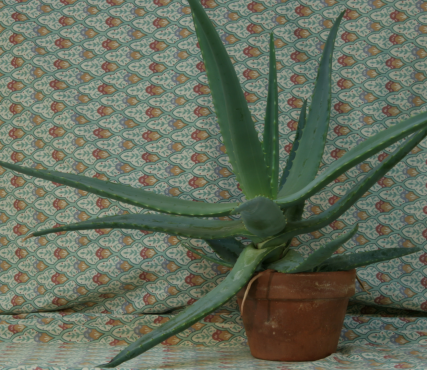

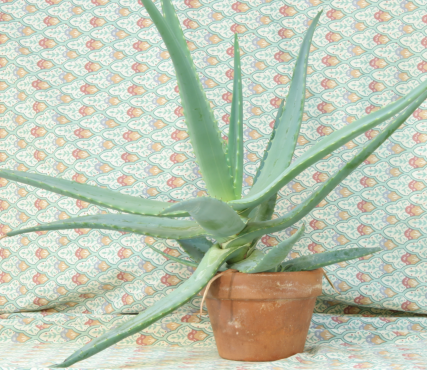

In [28]:
cv2_imshow(cv2.imread(left_img_path))
cv2_imshow(cv2.imread(right_img_path))

Saving result...
Done.


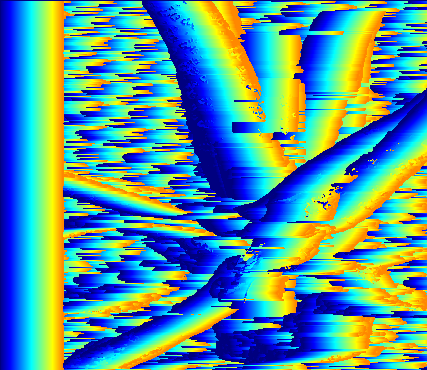

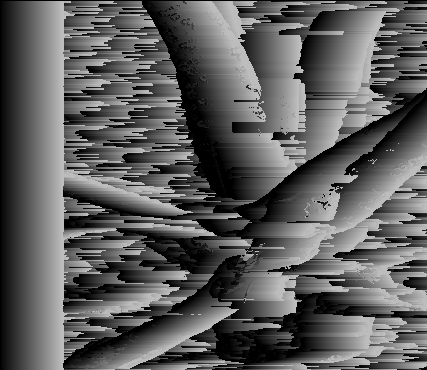

In [29]:
depth, color = window_based_matching_l1(left_img_path,
                                        right_img_path,
                                        disparity_range,
                                        kernel_size)
cv2_imshow(color)
cv2_imshow(depth)

Saving result...
Done.


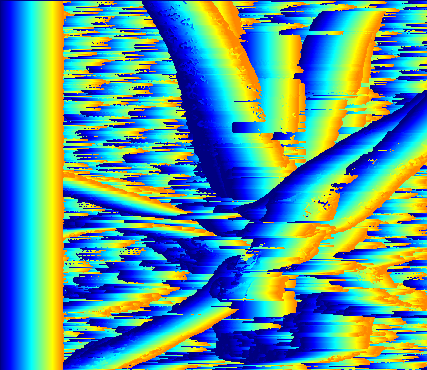

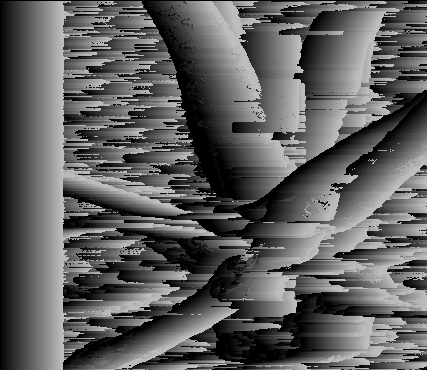

In [30]:
depth, color = window_based_matching_l2(left_img_path,
                                        right_img_path,
                                        disparity_range,
                                        kernel_size)
cv2_imshow(color)
cv2_imshow(depth)

#Problem 4 - Window-based matching using Cosine Similarity



In [31]:
def cosine_similarity(x, y):
  numerator = np.dot(x, y)
  denominator = np.linalg.norm(x) * np.linalg.norm(y)
  return numerator / denominator

In [32]:
def window_based_matching(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    kernel_half = int((kernel_size - 1) / 2)
    scale = 3

    for y in range(kernel_half, height-kernel_half):
        for x in range(kernel_half, width-kernel_half):
            # Find j where cost has minimum value
            disparity = 0
            cost_optimal  = -1

            for j in range(disparity_range):
                d = x - j
                cost = -1
                if (d - kernel_half) > 0:
                    wp = left[(y-kernel_half):(y+kernel_half)+1, (x-kernel_half):(x+kernel_half)+1]
                    wqd = right[(y-kernel_half):(y+kernel_half)+1, (d-kernel_half):(d+kernel_half)+1]

                    wp_flattened = wp.flatten()
                    wqd_flattened = wqd.flatten()

                    cost = cosine_similarity(wp_flattened, wqd_flattened)

                if cost > cost_optimal:
                    cost_optimal = cost
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite('window_based_cosine_similarity.png', depth)
        cv2.imwrite('window_based_cosine_similarity_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

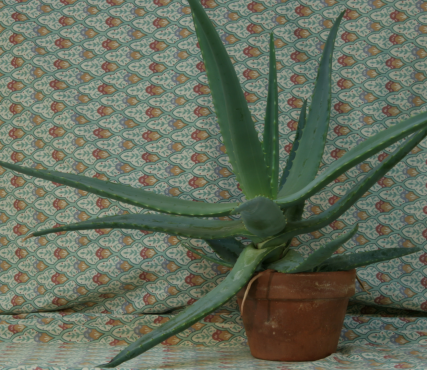

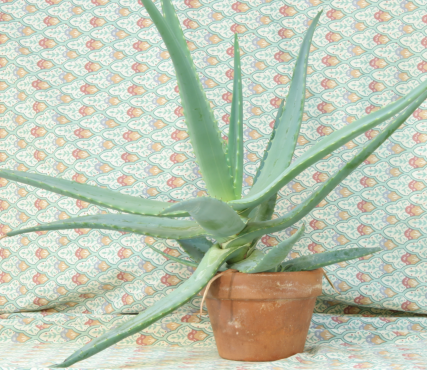

In [33]:
left_img_path = 'Aloe/Aloe_left_1.png'
right_img_path = 'Aloe/Aloe_right_2.png'
disparity_range = 64
kernel_size = 5

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

cv2_imshow(left)
cv2_imshow(right)

Done.


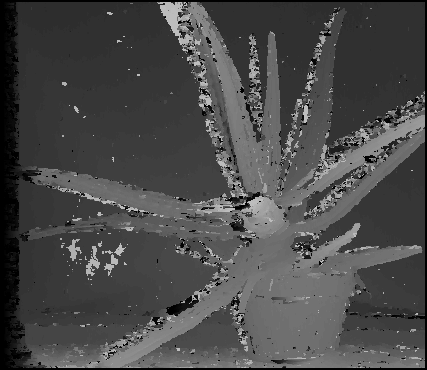

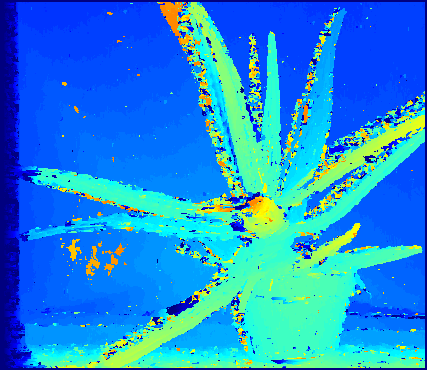

In [34]:
depth = window_based_matching(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=False
)
cv2_imshow(depth)
cv2_imshow(cv2.applyColorMap(depth, cv2.COLORMAP_JET))